# Reconocimiento Estadístico de Patrones

## Proyecto 1

### Equipo: Kathia Rangel Pompa, Juan Carlos Pérez Ramírez

**Resumen**

En este proyecto aplicamos el material visto en clase para analizar, comprender y resolver algunas preguntas de interés respecto a la base de datos del número de lugares libres por hora de diversos estacionamientos del estado de Guanajuato, la cual abarca el periodo del 19 de febrero de 2025 al 06 de marzo de 2025, un total de 16 días.

Preguntas de interés:
- Si estoy en Guanjuato tal día de la semana a cierta hora, ¿a qué estacionamiento me conviene ir?
- ¿Las personas se van del estacionamiento el mismo día?
- ¿Existe alguna relación entre los estacionamientos? ¿Si hay uno lleno, la gente se va a otro?

# Tratamiento de la base de datos



In [ ]:
# Leer base de datos
import pandas as pd

df = pd.read_csv('/content/disponibilidad_estacionamientos_final.csv')
df.head()

,Fecha_Hora,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-Pozuelos,Gto-SanPedro,Irapuato-Hidalgo,Leon-Mariachi
0,2025-02-19 15:15:15,147,32,45,475,214,178,119
1,2025-02-19 15:20:15,145,32,45,482,210,179,117
2,2025-02-19 15:25:16,149,32,44,483,212,178,120
3,2025-02-19 15:30:16,148,33,43,484,214,178,122
4,2025-02-19 15:35:17,148,37,45,490,212,176,123


In [ ]:
# Transformamos la columna Fecha_Hora para mejorar el análisis

df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'])
df['Hora'] = df['Fecha_Hora'].dt.hour
df['Fecha'] = df['Fecha_Hora'].dt.date
df['Dia'] = df['Fecha_Hora'].dt.day_name()
df.set_index('Fecha_Hora', inplace=True)

dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.head()

,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-Pozuelos,Gto-SanPedro,Irapuato-Hidalgo,Leon-Mariachi,Hora,Fecha,Dia
Fecha_Hora,,,,,,,,,,
2025-02-19 15:15:15,147,32,45,475,214,178,119,15,2025-02-19,Wednesday
2025-02-19 15:20:15,145,32,45,482,210,179,117,15,2025-02-19,Wednesday
2025-02-19 15:25:16,149,32,44,483,212,178,120,15,2025-02-19,Wednesday
2025-02-19 15:30:16,148,33,43,484,214,178,122,15,2025-02-19,Wednesday
2025-02-19 15:35:17,148,37,45,490,212,176,123,15,2025-02-19,Wednesday


In [ ]:
# Nos quedamos sólo con los estacionamientos de Guanajuato, excepto Pozuelos

df = df.drop(columns=['Gto-Pozuelos', 'Leon-Mariachi', 'Irapuato-Hidalgo'])
df.head()

,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-SanPedro,Hora,Fecha,Dia
Fecha_Hora,,,,,,,
2025-02-19 15:15:15,147,32,45,214,15,2025-02-19,Wednesday
2025-02-19 15:20:15,145,32,45,210,15,2025-02-19,Wednesday
2025-02-19 15:25:16,149,32,44,212,15,2025-02-19,Wednesday
2025-02-19 15:30:16,148,33,43,214,15,2025-02-19,Wednesday
2025-02-19 15:35:17,148,37,45,212,15,2025-02-19,Wednesday


In [ ]:
# Verificamos que no tenemos datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4071 entries, 2025-02-19 15:15:15 to 2025-03-06 08:04:14
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gto-Alhondiga  4071 non-null   int64 
 1   Gto-Alonso     4071 non-null   int64 
 2   Gto-Hinojo     4071 non-null   int64 
 3   Gto-SanPedro   4071 non-null   int64 
 4   Hora           4071 non-null   int32 
 5   Fecha          4071 non-null   object
 6   Dia            4071 non-null   object
dtypes: int32(1), int64(4), object(2)
memory usage: 238.5+ KB


In [ ]:
# Contamos los datos por fecha
df['Fecha'].value_counts()

,count
Fecha,
2025-02-28,321
2025-03-01,320
2025-03-02,304
2025-03-05,290
2025-02-20,289
2025-02-21,288
2025-02-24,288
2025-02-23,288
2025-02-25,288


# Visualización de los datos

- Gráfico temporal de la disponibilidad por estacionamiento:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

estacionamientos = ['Gto-Alhondiga', 'Gto-Alonso', 'Gto-Hinojo', 'Gto-SanPedro']
vmin = df[estacionamientos].min().min()
vmax = df[estacionamientos].max().max()

fig = px.line(df, x=df.index, y=estacionamientos,
              title="Disponibilidad de estacionamientos")
fig.update_layout(xaxis_title="Fecha y Hora", yaxis_title="Lugares libres")
fig.show()

- Heatmap de disponibilidad por estacionamiento

<ipython-input-610-c5deef03ae62>:52: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



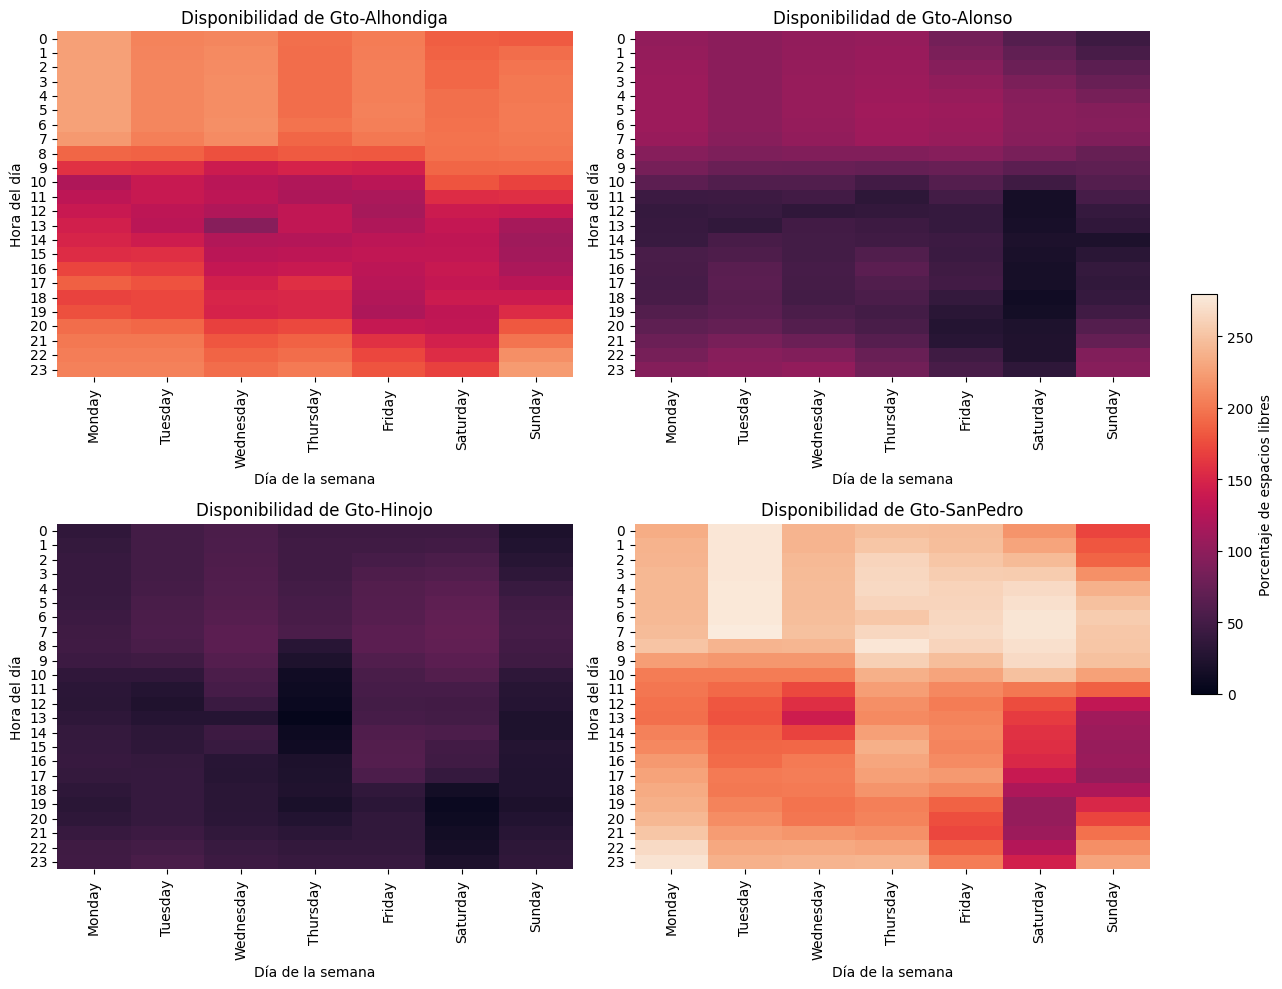

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estimamos la capacidad de cada estacionamiento como su máximo de lugares libres
capacidades_estimadas = df[estacionamientos].max()

orden_dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
n = len(estacionamientos)

# Encontrar vmin y vmax globales
#vmin = float('inf')
vmin = 0
#vmax = float('-inf')
vmax = 100

for estacionamiento in estacionamientos:
    pivot = df.pivot_table(index='Hora', columns='Dia', values=estacionamiento, aggfunc='mean', observed=False)
    vmin = min(vmin, pivot.min().min())
    vmax = max(vmax, pivot.max().max())

# Crear figura y ejes con espacio adicional para la colorbar
ncols = 2
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 5 * nrows))
axes = axes.flatten()

# Crear un solo objeto de mapa de calor para extraer la colorbar después
heatmaps = []

for i, estacionamiento in enumerate(estacionamientos):
    pivot = df.pivot_table(index='Hora', columns='Dia', values=estacionamiento, aggfunc='mean', observed=False)
    pivot = pivot.reindex(columns=dias_orden)

    hm = sns.heatmap(
        pivot, annot=False, cmap='rocket',
        vmin=vmin, vmax=vmax, ax=axes[i], cbar=False  # desactiva colorbar individual
    )
    heatmaps.append(hm)
    axes[i].set_title(f'Disponibilidad de {estacionamiento}')
    axes[i].set_xlabel('Día de la semana')
    axes[i].set_ylabel('Hora del día')

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Agregar colorbar general a la derecha
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
cbar = fig.colorbar(heatmaps[0].collections[0], cax=cbar_ax)
cbar.set_label('Porcentaje de espacios libres')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deja espacio para la colorbar
plt.show()

<ipython-input-611-4eb6f6aedd0b>:29: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



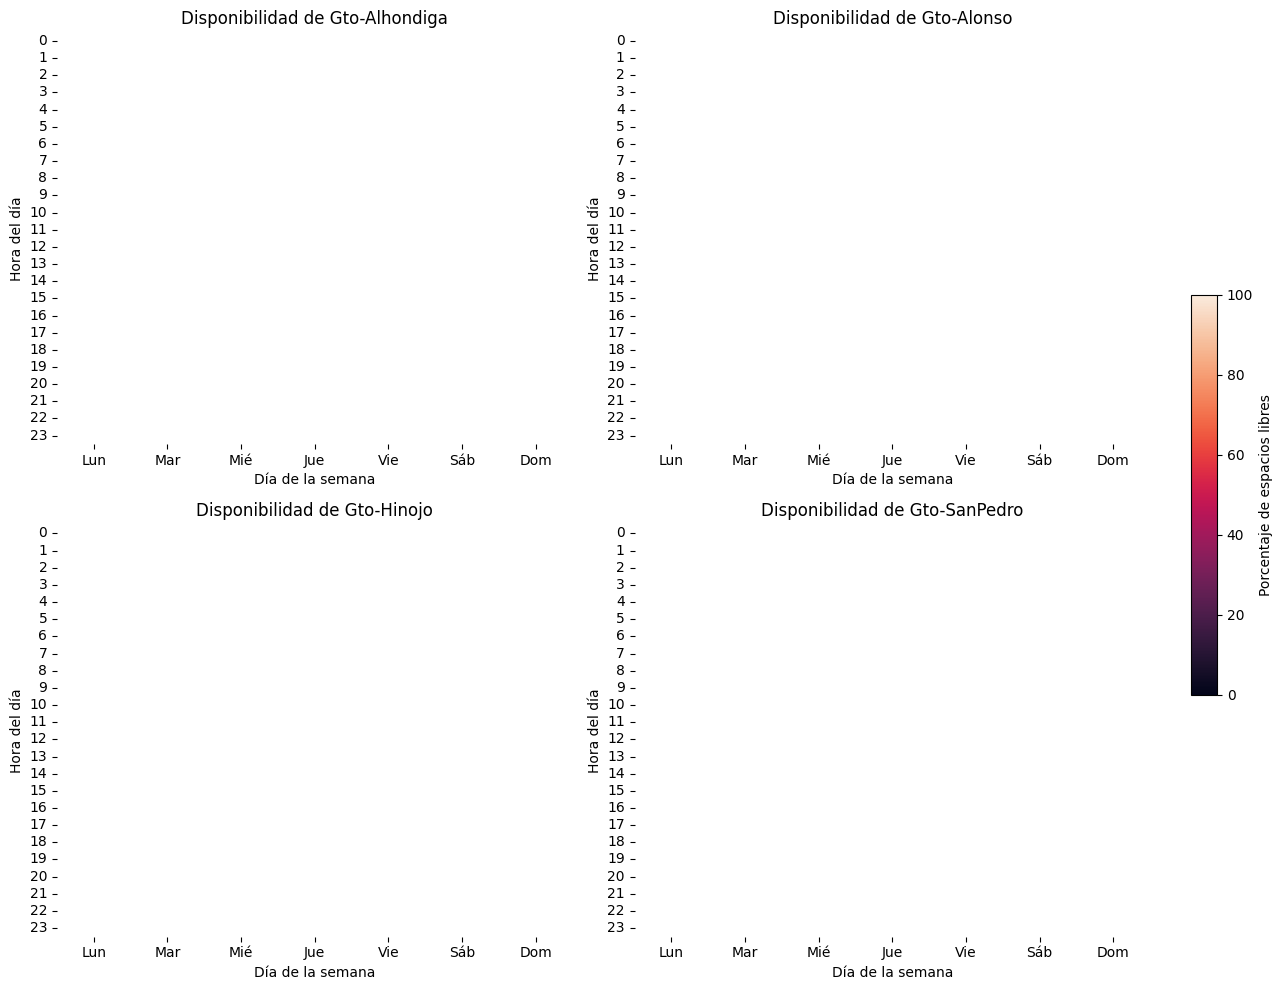

In [ ]:
# Calculamos el heatmap en función del porcentaje de lugares libres

ncols = 2
nrows = (4 + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 5 * nrows))
axes = axes.flatten()

# Crear un solo objeto de mapa de calor para extraer la colorbar después
heatmaps = []

for i, estacionamiento in enumerate(estacionamientos):
  pivot = df.pivot_table(index='Hora', columns='Dia', values=estacionamiento, aggfunc='mean', observed=False)
  pivot = pivot.reindex(columns=orden_dias)
  hm = sns.heatmap(pivot, annot=False, cmap='rocket', vmin=0, vmax=100, ax=axes[i], cbar=False)
  heatmaps.append(hm)
  axes[i].set_title(f'Disponibilidad de {estacionamiento}')
  axes[i].set_xlabel('Día de la semana')
  axes[i].set_ylabel('Hora del día')

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Agregar colorbar general a la derecha
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
cbar = fig.colorbar(heatmaps[0].collections[0], cax=cbar_ax)
cbar.set_label('Porcentaje de espacios libres')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deja espacio para la colorbar
plt.show()

In [ ]:
# Calculamos el heatmap en función del porcentaje de lugares libres
for estacionamiento in estacionamientos:
  plt.figure(figsize=(10, 6))
  sns.heatmap(df.pivot_table(index='Hora', columns='Dia', values=f'{estacionamiento}_norm', aggfunc='mean', observed=False), fmt=".1f", vmin=0, vmax=100)
  plt.title(f'Disponibilidad de {estacionamiento}')
  plt.xlabel('Día de la semana')
  plt.ylabel('Hora del día')
  plt.tight_layout()
  plt.show()

KeyError: 'Gto-Alhondiga_norm'

<Figure size 1000x600 with 0 Axes>

- Boxplot de disponibilidad por hora:

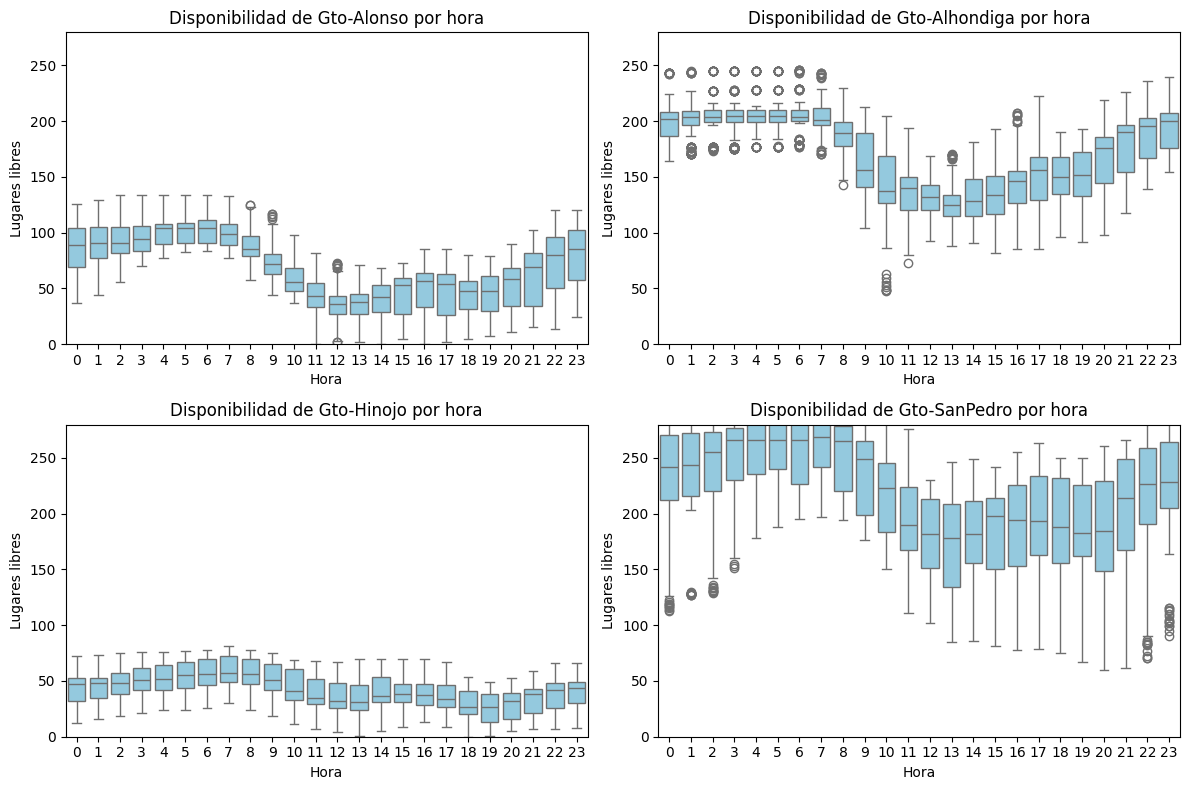

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Hora', y='Gto-Alonso', data=df, color='skyblue')
plt.title('Disponibilidad de Gto-Alonso por hora')
plt.xlabel('Hora')
plt.ylabel('Lugares libres')
plt.ylim(vmin, vmax)

plt.subplot(2, 2, 2)
sns.boxplot(x='Hora', y='Gto-Alhondiga', data=df, color='skyblue')
plt.title('Disponibilidad de Gto-Alhondiga por hora')
plt.xlabel('Hora')
plt.ylabel('Lugares libres')
plt.ylim(vmin, vmax)

plt.subplot(2, 2, 3)
sns.boxplot(x='Hora', y='Gto-Hinojo', data=df, color='skyblue')
plt.title('Disponibilidad de Gto-Hinojo por hora')
plt.xlabel('Hora')
plt.ylabel('Lugares libres')
plt.ylim(vmin, vmax)

plt.subplot(2, 2, 4)
sns.boxplot(x='Hora', y='Gto-SanPedro', data=df, color='skyblue')
plt.title('Disponibilidad de Gto-SanPedro por hora')
plt.xlabel('Hora')
plt.ylabel('Lugares libres')
plt.ylim(vmin, vmax)

plt.tight_layout()
plt.show()

- Matriz de correlación entre estacionamientos:

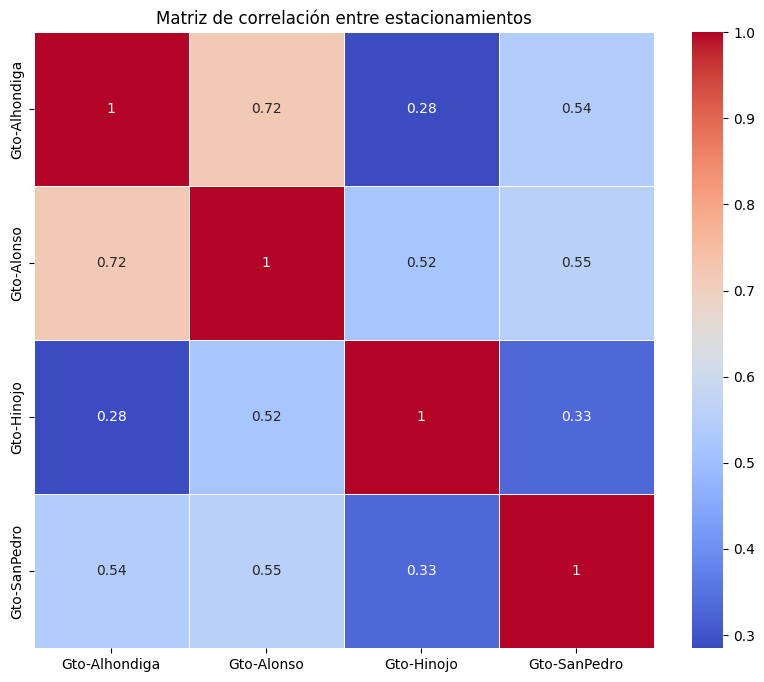

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Gto-Alhondiga', 'Gto-Alonso', 'Gto-Hinojo', 'Gto-SanPedro']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre estacionamientos')
plt.show()

- Relación entre los estacionamientos Alonso y Alhóndiga

<Figure size 1000x800 with 0 Axes>

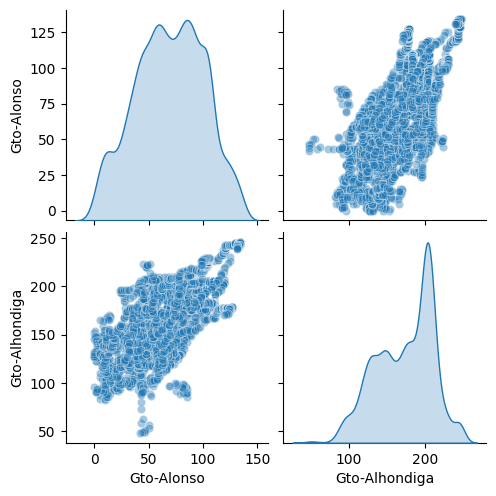

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Gto-Alonso', 'Gto-Alhondiga']], diag_kind = 'kde', plot_kws={'alpha':0.4})
plt.show()

## Predicción

- Preparamos los datos para la clasificación

In [ ]:
df_group = df.resample('30min').agg({'Gto-Alhondiga': 'mean', 'Gto-Alonso': 'mean', 'Gto-Hinojo': 'mean', 'Gto-SanPedro': 'mean'})
df_group.reset_index(inplace=True)

In [ ]:
df_group.head()

,Fecha_Hora,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-SanPedro
0,2025-02-19 15:00:00,147.000000,32.000000,44.666667,212.000000
1,2025-02-19 15:30:00,148.000000,39.000000,45.000000,214.333333
2,2025-02-19 16:00:00,145.833333,42.500000,22.166667,219.000000
3,2025-02-19 16:30:00,147.833333,42.666667,14.166667,216.000000
4,2025-02-19 17:00:00,157.333333,39.833333,14.666667,215.333333


In [ ]:
# Verificamos si hay valores nulos

df_group.isnull().sum()

,0
Fecha_Hora,0
Gto-Alhondiga,35
Gto-Alonso,35
Gto-Hinojo,35
Gto-SanPedro,35


In [ ]:
# Checamos en qué fechas hay valores nulos

for x in df_group.index:
  if pd.isnull(df_group.loc[x, 'Gto-Alhondiga']):
    print(df_group.loc[x, 'Fecha_Hora'])

2025-02-26 13:00:00
2025-02-26 13:30:00
2025-02-26 15:00:00
2025-02-26 15:30:00
2025-02-26 16:00:00
2025-02-26 16:30:00
2025-02-26 17:00:00
2025-02-26 17:30:00
2025-02-26 18:00:00
2025-02-26 18:30:00
2025-02-26 19:00:00
2025-02-27 02:00:00
2025-02-27 02:30:00
2025-02-27 03:00:00
2025-02-27 03:30:00
2025-02-27 04:00:00
2025-02-27 04:30:00
2025-02-27 05:00:00
2025-02-27 07:30:00
2025-02-27 08:00:00
2025-02-27 08:30:00
2025-02-27 09:00:00
2025-02-27 09:30:00
2025-02-27 10:00:00
2025-02-27 10:30:00
2025-02-27 11:00:00
2025-02-27 11:30:00
2025-02-27 12:00:00
2025-02-27 12:30:00
2025-02-27 13:00:00
2025-02-27 13:30:00
2025-02-27 14:00:00
2025-02-27 14:30:00
2025-02-27 15:00:00
2025-02-27 15:30:00


In [ ]:
# Eliminamos los valores nulos

df_group.dropna(inplace=True)

df_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, 0 to 706
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha_Hora     672 non-null    datetime64[ns]
 1   Gto-Alhondiga  672 non-null    float64       
 2   Gto-Alonso     672 non-null    float64       
 3   Gto-Hinojo     672 non-null    float64       
 4   Gto-SanPedro   672 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 31.5 KB


In [ ]:
# Creamos columnas separadas para Dia, Mes, Año, Hora y Dia de la semana

df_group['Hora'] = df_group['Fecha_Hora'].dt.time
df_group['Año'] = df_group['Fecha_Hora'].dt.year
df_group['Mes'] = df_group['Fecha_Hora'].dt.month
df_group['Dia'] = df_group['Fecha_Hora'].dt.day
df_group['Dia_Semana'] = df_group['Fecha_Hora'].dt.day_name()
df_group.head()

,Fecha_Hora,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-SanPedro,Hora,Año,Mes,Dia,Dia_Semana
0,2025-02-19 15:00:00,147.000000,32.000000,44.666667,212.000000,15:00:00,2025,2,19,Wednesday
1,2025-02-19 15:30:00,148.000000,39.000000,45.000000,214.333333,15:30:00,2025,2,19,Wednesday
2,2025-02-19 16:00:00,145.833333,42.500000,22.166667,219.000000,16:00:00,2025,2,19,Wednesday
3,2025-02-19 16:30:00,147.833333,42.666667,14.166667,216.000000,16:30:00,2025,2,19,Wednesday
4,2025-02-19 17:00:00,157.333333,39.833333,14.666667,215.333333,17:00:00,2025,2,19,Wednesday


In [ ]:
# Normalizamos los espacios libres

capacidades_estimadas = df_group[estacionamientos].max()

for estacionamiento in estacionamientos:
  df_group[estacionamiento] = df_group[estacionamiento] / capacidades_estimadas[estacionamiento]

# Hacemos una columna del estacionamiento con mayor disponibilidad
df_group['Mejor_Estacionamiento'] = df_group[estacionamientos].idxmax(axis=1)

df_group.head()

,Fecha_Hora,Gto-Alhondiga,Gto-Alonso,Gto-Hinojo,Gto-SanPedro,Hora,Año,Mes,Dia,Dia_Semana,Mejor_Estacionamiento
0,2025-02-19 15:00:00,0.599592,0.238806,0.559499,0.673729,15:00:00,2025,2,19,Wednesday,Gto-SanPedro
1,2025-02-19 15:30:00,0.603671,0.291045,0.563674,0.681144,15:30:00,2025,2,19,Wednesday,Gto-SanPedro
2,2025-02-19 16:00:00,0.594833,0.317164,0.277662,0.695975,16:00:00,2025,2,19,Wednesday,Gto-SanPedro
3,2025-02-19 16:30:00,0.602991,0.318408,0.177453,0.686441,16:30:00,2025,2,19,Wednesday,Gto-SanPedro
4,2025-02-19 17:00:00,0.641740,0.297264,0.183716,0.684322,17:00:00,2025,2,19,Wednesday,Gto-SanPedro


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Clasficamos con Hora, Dia y Fecha como features
X = df_group[['Hora', 'Dia', 'Año', 'Mes', 'Dia_Semana']].copy()

# Convertimos la hora como segundos del día
X['Hora'] = X['Hora'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)

# Codificamos el Dia como OneHot
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df_group[['Dia_Semana']])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Dia_Semana']))

Data = pd.concat([X_encoded, X[['Hora','Dia', 'Año','Mes']].reset_index(drop=True)],axis=1)
labels = df_group['Mejor_Estacionamiento']

print(Data.head())

   Dia_Semana_Friday  Dia_Semana_Monday  Dia_Semana_Saturday  \
0                0.0                0.0                  0.0   
1                0.0                0.0                  0.0   
2                0.0                0.0                  0.0   
3                0.0                0.0                  0.0   
4                0.0                0.0                  0.0   

   Dia_Semana_Sunday  Dia_Semana_Thursday  Dia_Semana_Tuesday  \
0                0.0                  0.0                 0.0   
1                0.0                  0.0                 0.0   
2                0.0                  0.0                 0.0   
3                0.0                  0.0                 0.0   
4                0.0                  0.0                 0.0   

   Dia_Semana_Wednesday   Hora  Dia   Año  Mes  
0                   1.0  54000   19  2025    2  
1                   1.0  55800   19  2025    2  
2                   1.0  57600   19  2025    2  
3                   1.0  594

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.2, random_state=42, stratify=labels)

- Árbol de decisión:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_tree = dt.predict(X_test)
print(f'Accuracy Decision Tree: {accuracy_score(y_test, y_pred_tree):.4f}')

Accuracy Decision Tree: 0.9259


[Text(0.445211038961039, 0.9545454545454546, 'x[8] <= 4.5\ngini = 0.638\nsamples = 537\nvalue = [230, 19, 74, 214]'),
 Text(0.1525974025974026, 0.8636363636363636, 'x[2] <= 0.5\ngini = 0.482\nsamples = 158\nvalue = [110.0, 10.0, 16.0, 22.0]'),
 Text(0.2989042207792208, 0.9090909090909092, 'True  '),
 Text(0.08441558441558442, 0.7727272727272727, 'x[8] <= 3.5\ngini = 0.36\nsamples = 116\nvalue = [91.0, 10.0, 0.0, 15.0]'),
 Text(0.05194805194805195, 0.6818181818181818, 'x[7] <= 33300.0\ngini = 0.24\nsamples = 80\nvalue = [69, 10, 0, 1]'),
 Text(0.025974025974025976, 0.5909090909090909, 'x[8] <= 2.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10, 0, 0]'),
 Text(0.012987012987012988, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0]'),
 Text(0.03896103896103896, 0.5, 'x[7] <= 9900.0\ngini = 0.494\nsamples = 18\nvalue = [8, 10, 0, 0]'),
 Text(0.025974025974025976, 0.4090909090909091, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0]'),
 Text(0.05194805194805195, 0.4090909090909091, 'x[7] <= 

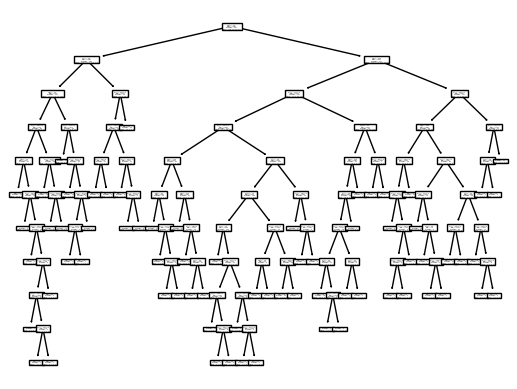

In [ ]:
tree.plot_tree(dt)

In [ ]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00124146, 0.00148976, 0.00165529, 0.00167598,
        0.00175266, 0.00175874, 0.00177755, 0.00182419, 0.0018622 ,
        0.0018622 , 0.00244413, 0.00248293, 0.00321048, 0.00341403,
        0.00344851, 0.00353818, 0.00532056, 0.00558659, 0.00560607,
        0.0057935 , 0.00660234, 0.0073    , 0.00864834, 0.00893855,
        0.00906809, 0.01021548, 0.01135562, 0.01291593, 0.01337108,
        0.01569601, 0.016946  , 0.0178583 , 0.01793959, 0.01795301,
        0.0186224 , 0.02227806, 0.05392371, 0.05882417]),
 'impurities': array([0.        , 0.00248293, 0.00546245, 0.00877302, 0.01212497,
        0.01563029, 0.01914777, 0.02270287, 0.02635126, 0.02821346,
        0.03193785, 0.03682612, 0.03930905, 0.04573001, 0.05255806,
        0.05945509, 0.06299326, 0.06831383, 0.07390042, 0.08511255,
        0.09090606, 0.10411073, 0.11871072, 0.14465575, 0.1535943 ,
        0.17173049, 0.18194597, 0.20465721, 0.24340501, 0.28351826,
        0.29921427, 0.31616027

In [ ]:
clfs = []

for ccp_alpha in path.ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

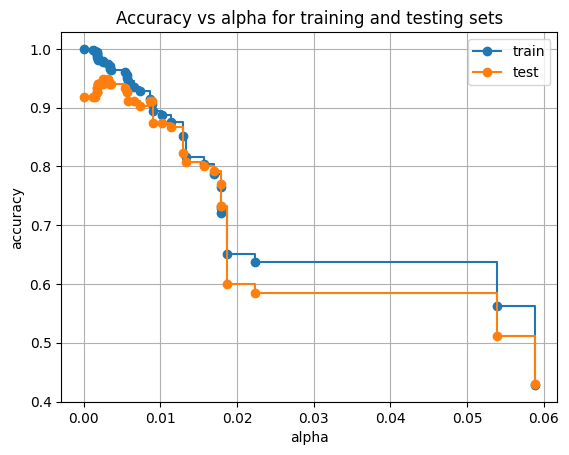

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(path.ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(path.ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
ax.grid()
plt.show()

In [ ]:
# Escogemos alpha = 0.005

clf1 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)
clf1.fit(X_train, y_train)

print(f"Accuracy with alpha = 0.005: {clf1.score(X_test, y_test):.4f}")

Accuracy with alpha = 0.005: 0.9407


[Text(0.4524739583333333, 0.9444444444444444, 'x[8] <= 4.5\ngini = 0.638\nsamples = 537\nvalue = [230, 19, 74, 214]'),
 Text(0.13541666666666666, 0.8333333333333334, 'x[8] <= 1.5\ngini = 0.482\nsamples = 158\nvalue = [110.0, 10.0, 16.0, 22.0]'),
 Text(0.2939453125, 0.8888888888888888, 'True  '),
 Text(0.08333333333333333, 0.7222222222222222, 'x[7] <= 54900.0\ngini = 0.622\nsamples = 42\nvalue = [19, 0, 16, 7]'),
 Text(0.0625, 0.6111111111111112, 'x[7] <= 18900.0\ngini = 0.56\nsamples = 27\nvalue = [4, 0, 16, 7]'),
 Text(0.041666666666666664, 0.5, 'x[7] <= 6300.0\ngini = 0.48\nsamples = 10\nvalue = [4, 0, 0, 6]'),
 Text(0.020833333333333332, 0.3888888888888889, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(0.0625, 0.3888888888888889, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.111\nsamples = 17\nvalue = [0, 0, 16, 1]'),
 Text(0.10416666666666667, 0.6111111111111112, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0]'),
 Text(0.1875

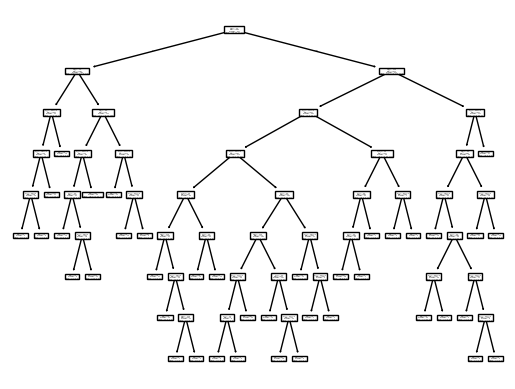

In [ ]:
tree.plot_tree(clf1)

- K-NN:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print(f'Accuracy KNN: {accuracy_score(y_test, y_pred_knn):.4f}')

Accuracy KNN: 0.9333
